In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the cleaned data
telco_churn_df = pd.read_csv('cleaned_telco_churn.csv')

# Initial look at the data structure
telco_churn_df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


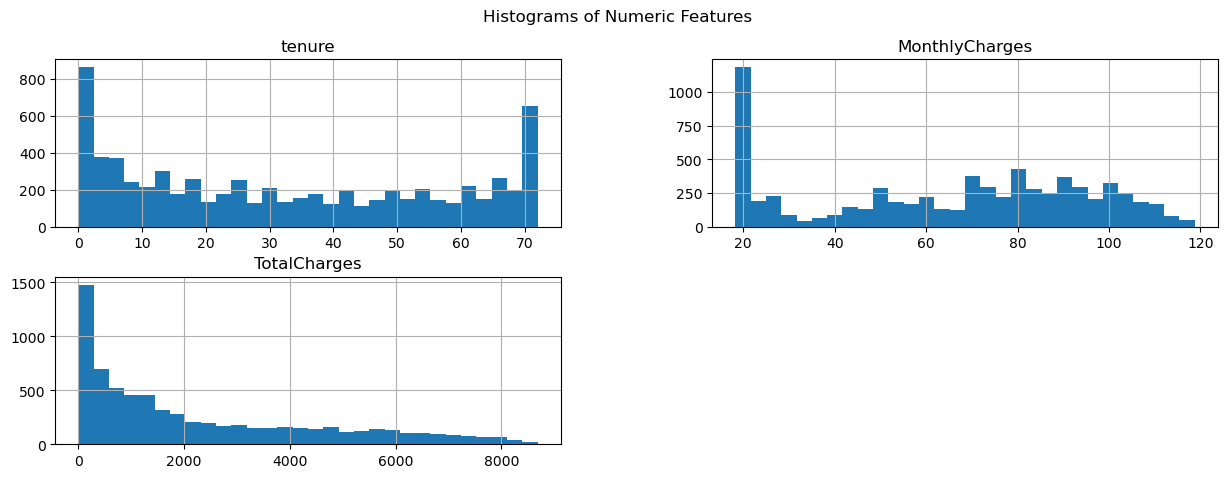

In [2]:
# Univariate Analysis

# Histograms for numeric features
telco_churn_df.hist(['tenure', 'MonthlyCharges', 'TotalCharges'], bins=30, figsize=(15, 5))
plt.suptitle('Histograms of Numeric Features')
plt.show()



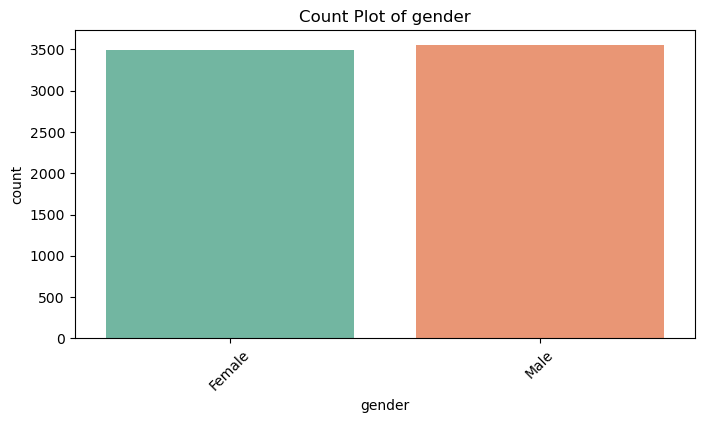

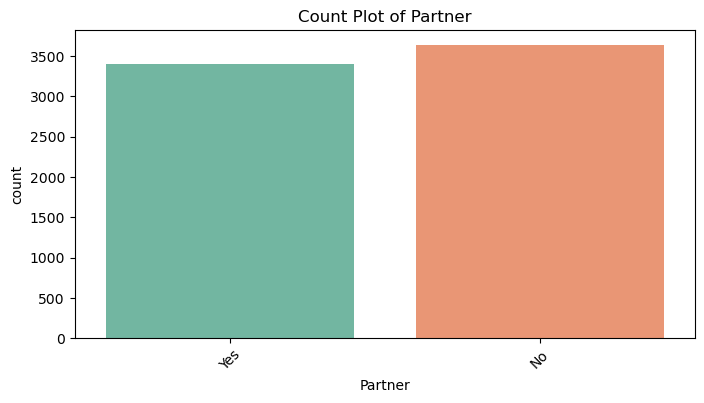

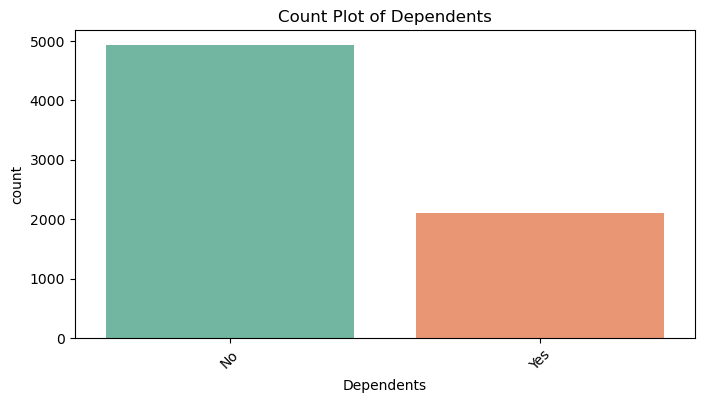

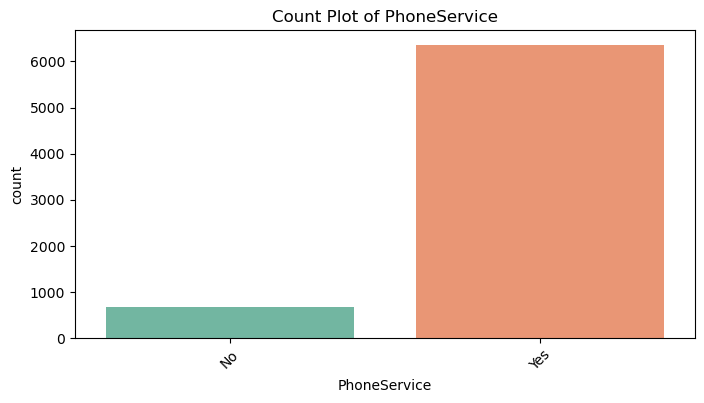

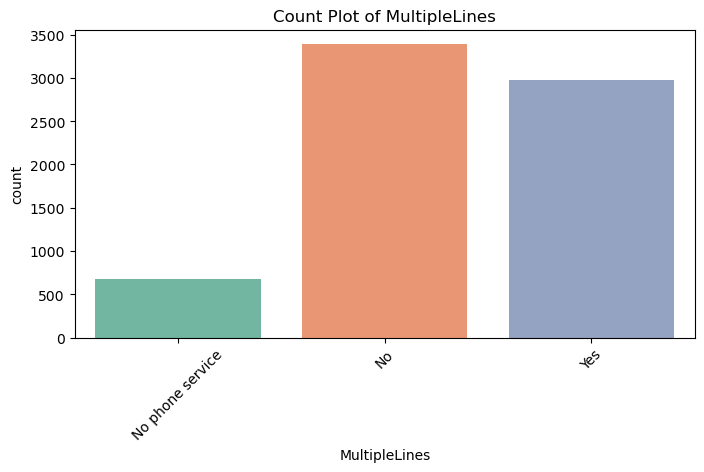

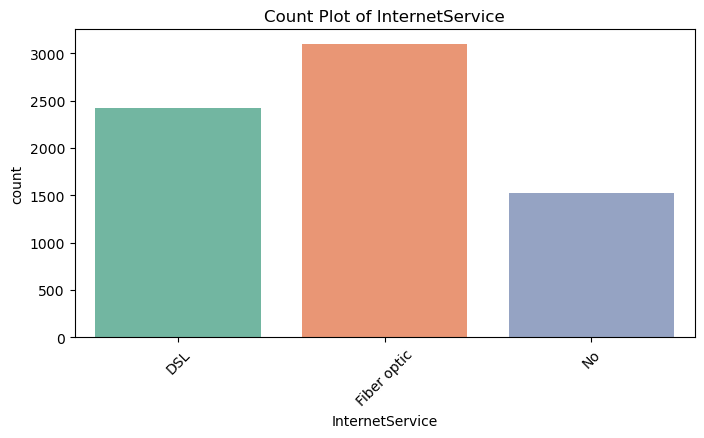

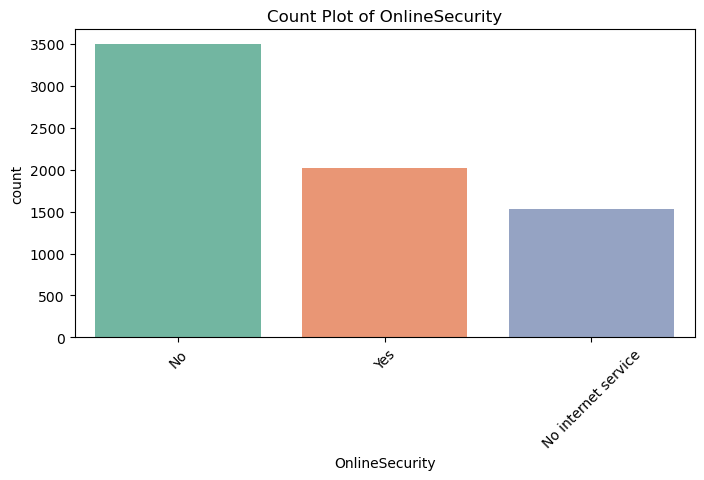

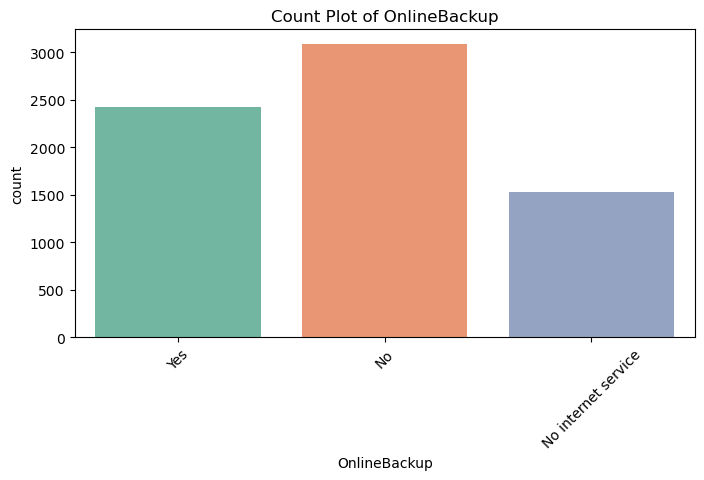

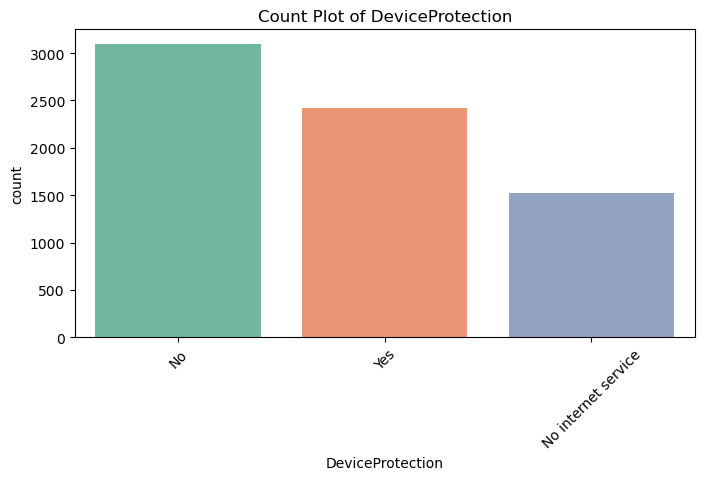

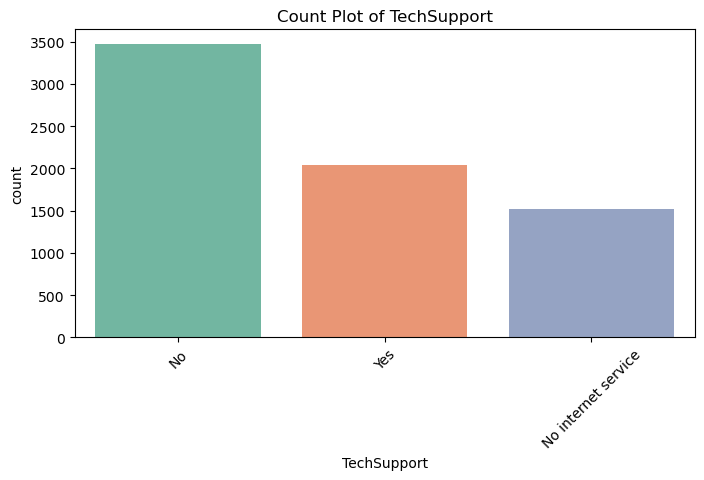

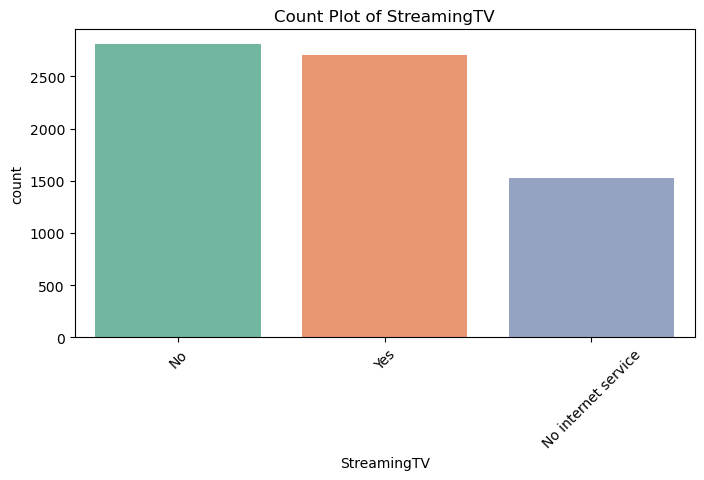

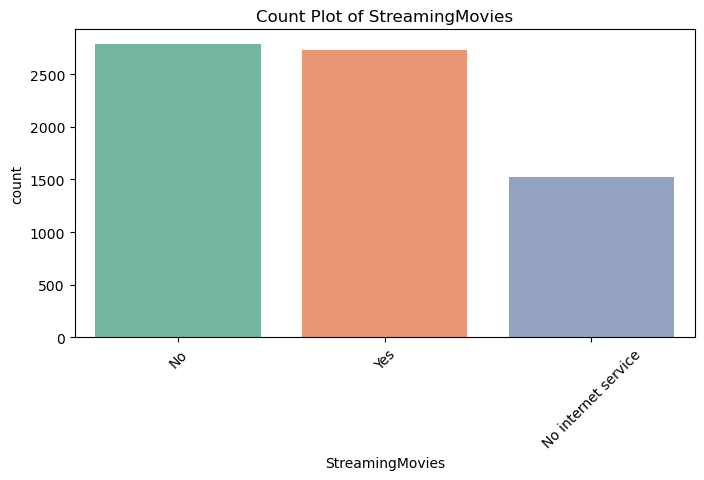

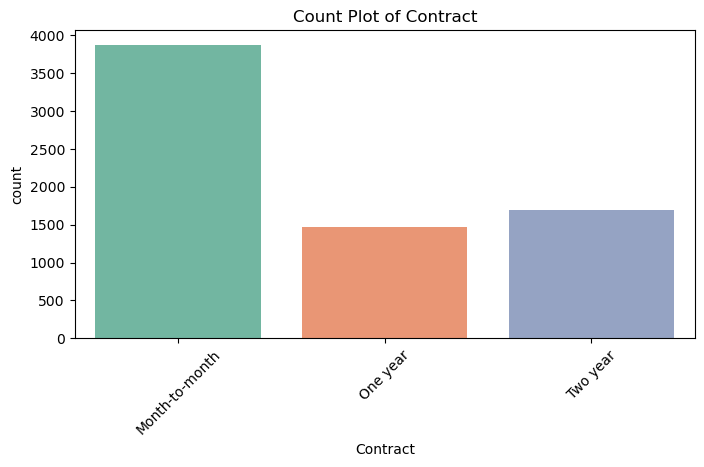

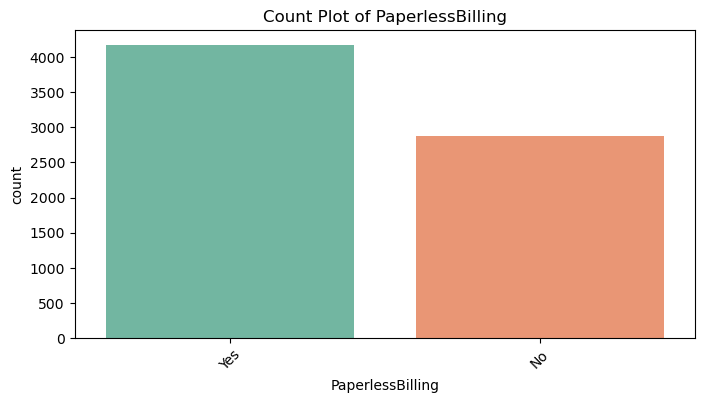

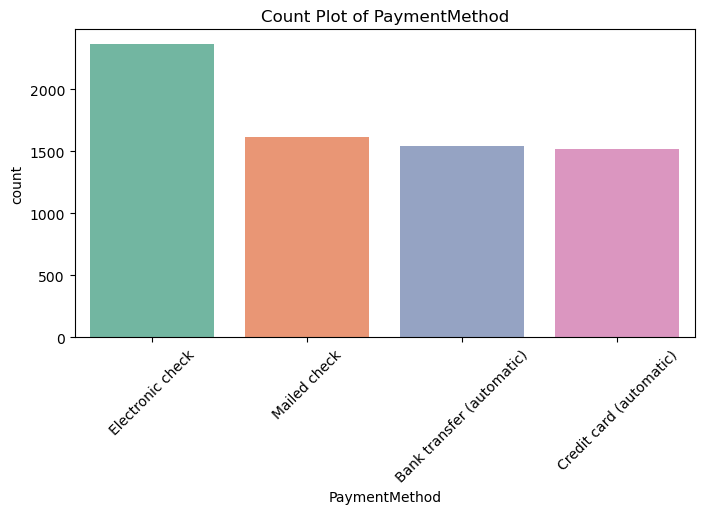

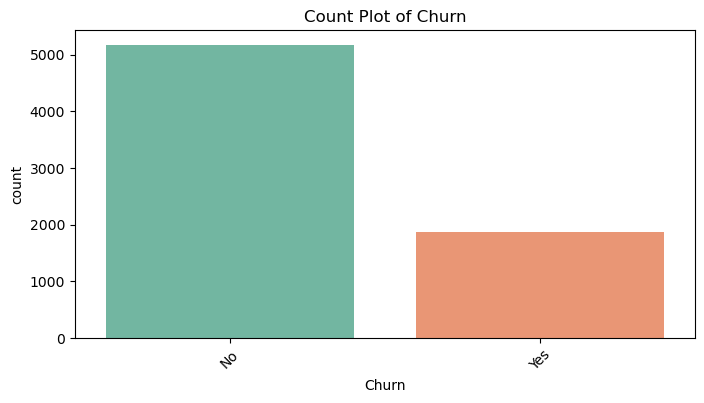

In [3]:
# Count plots for categorical features
categorical_features = telco_churn_df.select_dtypes(include=['object']).columns.drop('customerID')  # Exclude ID-like columns
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=telco_churn_df, palette='Set2')
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

    

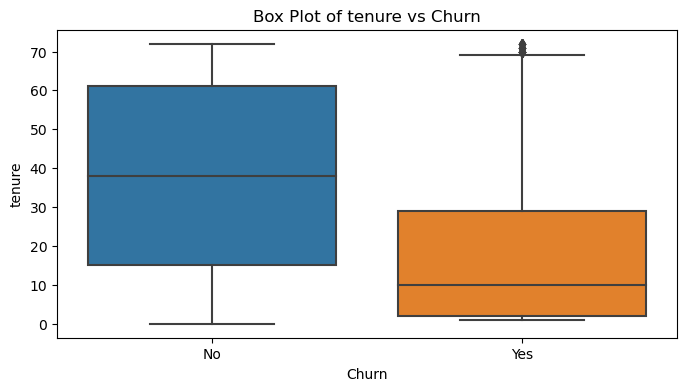

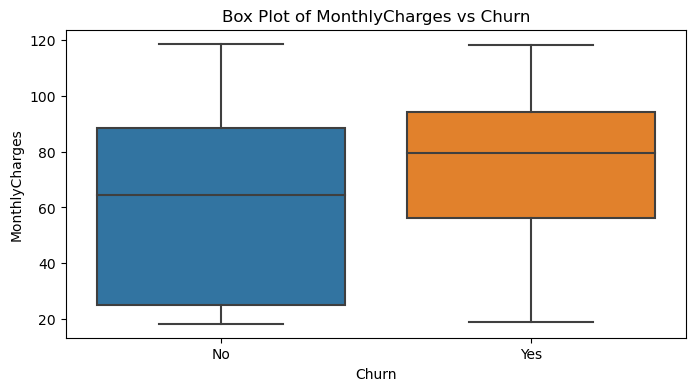

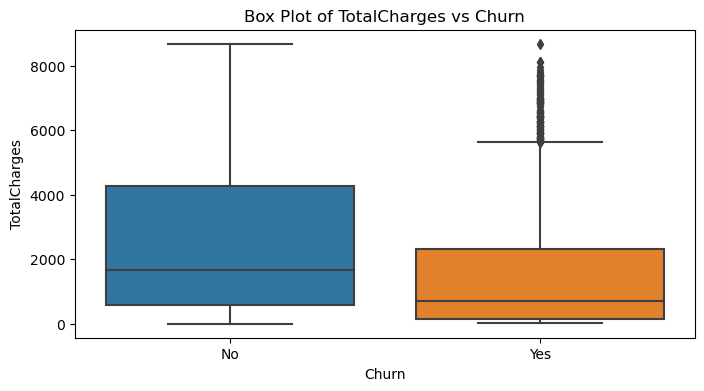

In [4]:
# Bivariate Analysis between each feature and the target ('Churn')

# Boxplots for numeric features against Churn
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Churn', y=col, data=telco_churn_df)
    plt.title(f'Box Plot of {col} vs Churn')
    plt.show()


<Figure size 800x400 with 0 Axes>

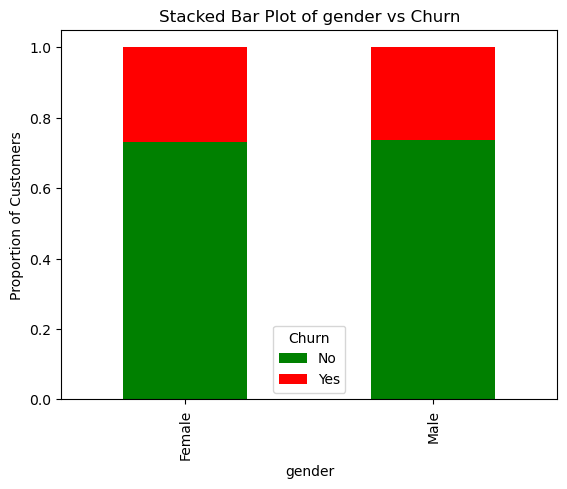

<Figure size 800x400 with 0 Axes>

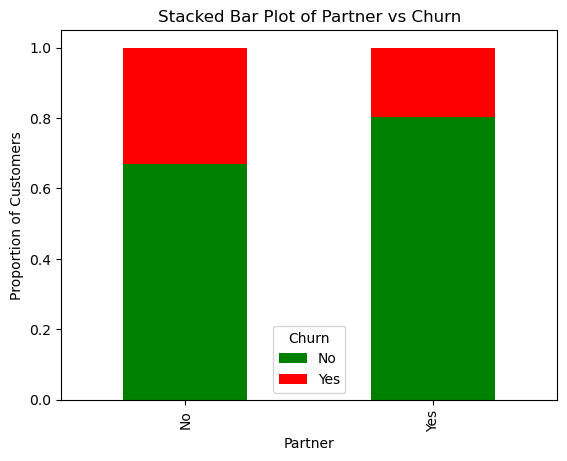

<Figure size 800x400 with 0 Axes>

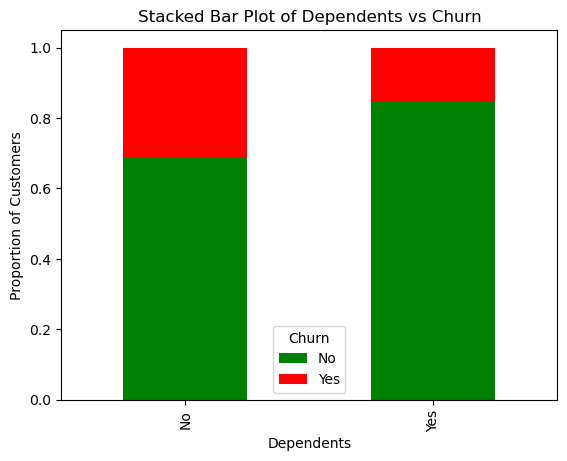

<Figure size 800x400 with 0 Axes>

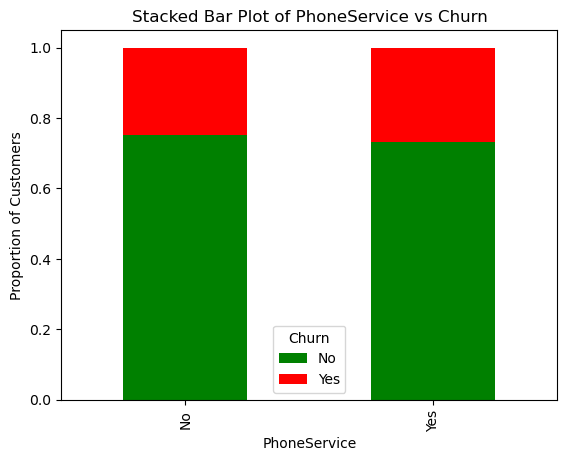

<Figure size 800x400 with 0 Axes>

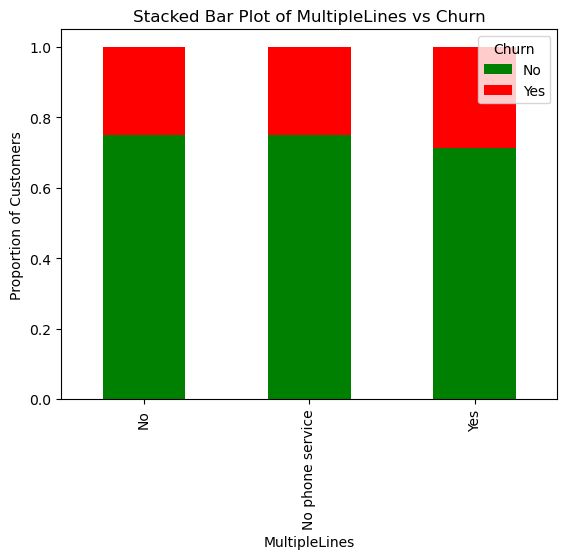

<Figure size 800x400 with 0 Axes>

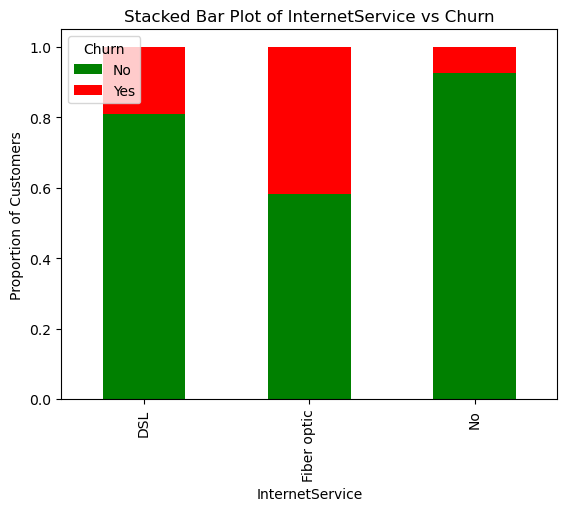

<Figure size 800x400 with 0 Axes>

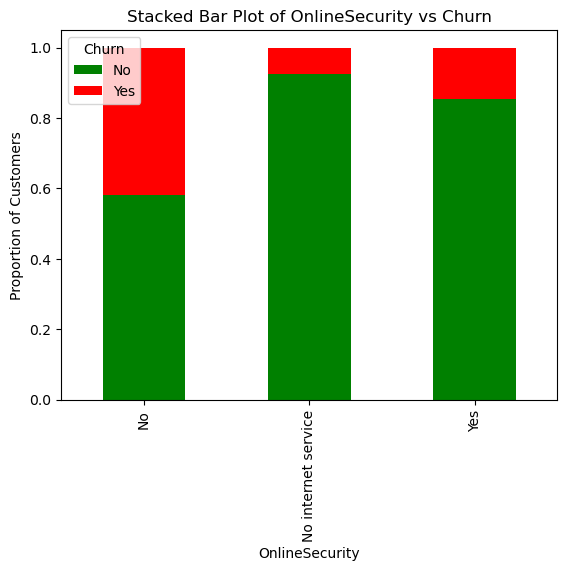

<Figure size 800x400 with 0 Axes>

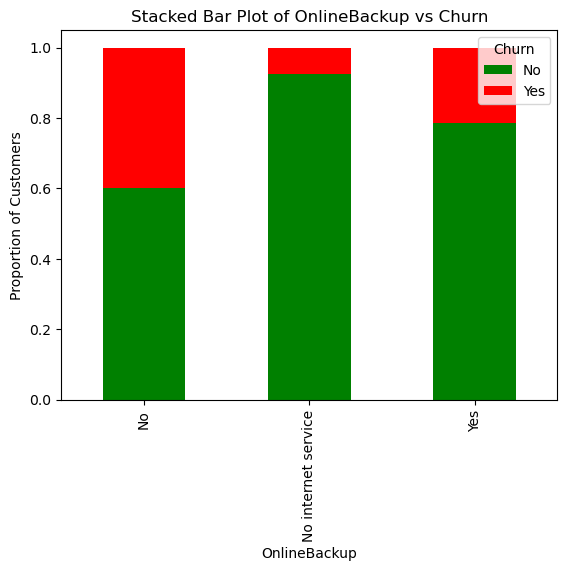

<Figure size 800x400 with 0 Axes>

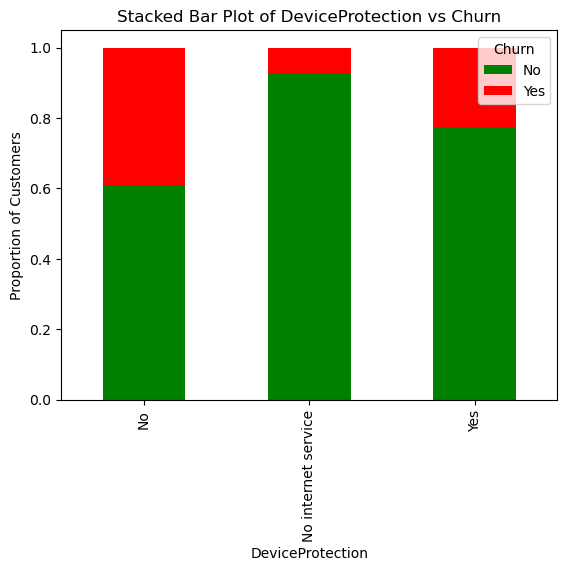

<Figure size 800x400 with 0 Axes>

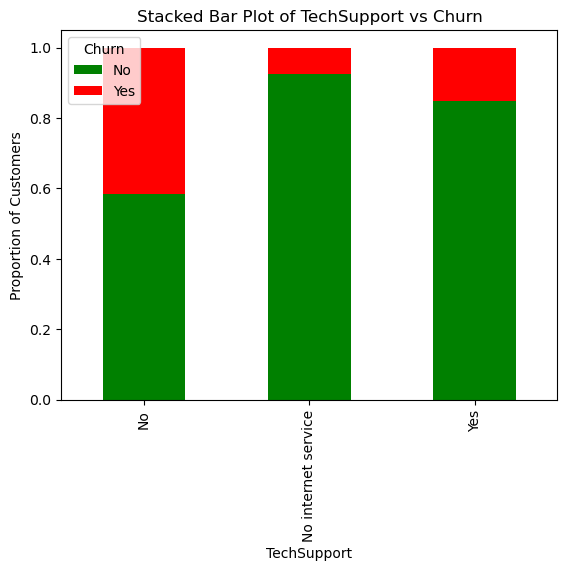

<Figure size 800x400 with 0 Axes>

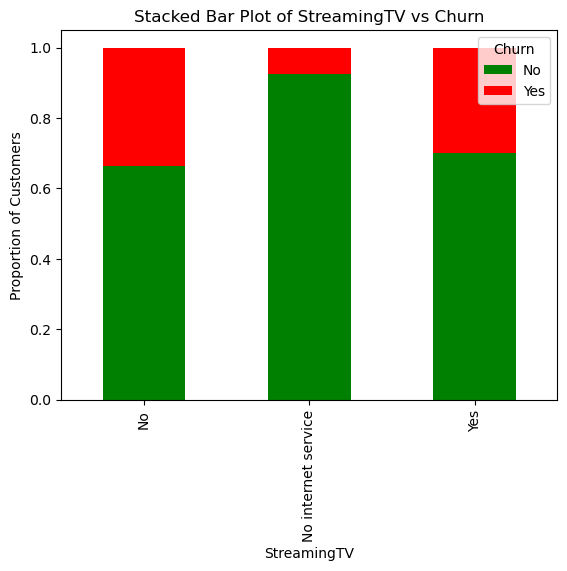

<Figure size 800x400 with 0 Axes>

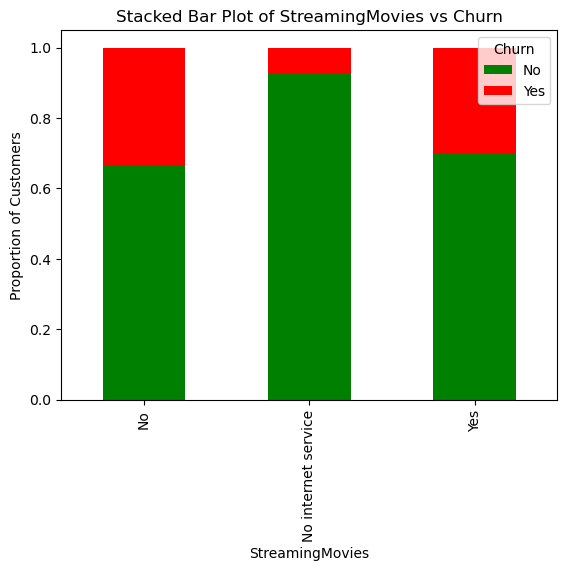

<Figure size 800x400 with 0 Axes>

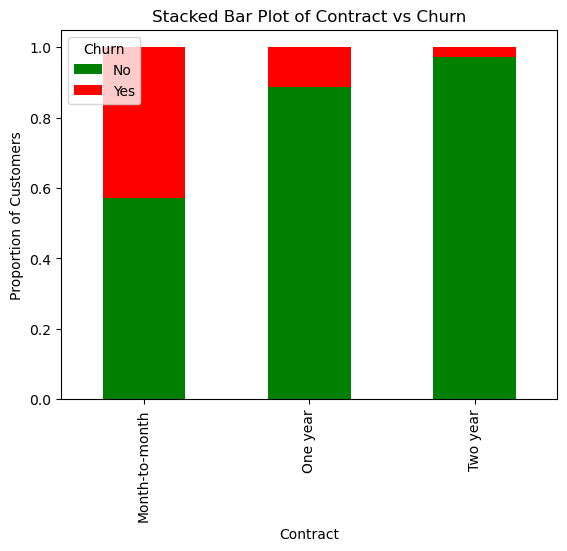

<Figure size 800x400 with 0 Axes>

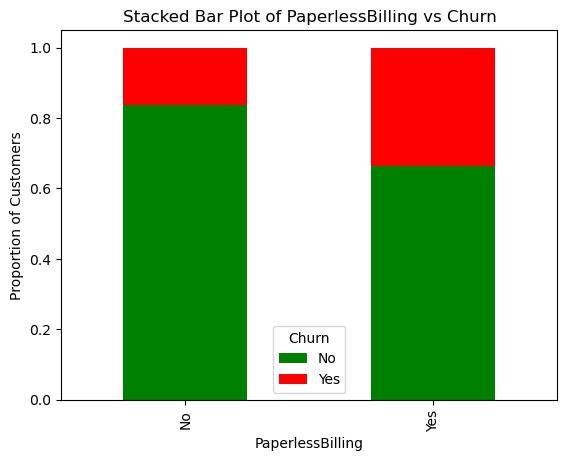

<Figure size 800x400 with 0 Axes>

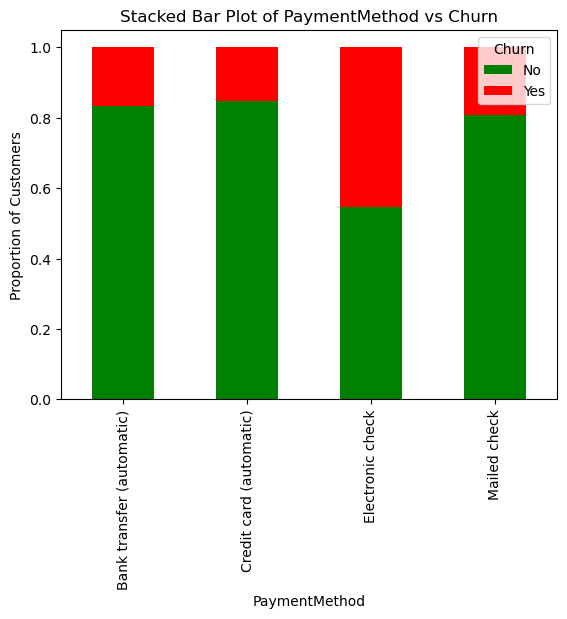

<Figure size 800x400 with 0 Axes>

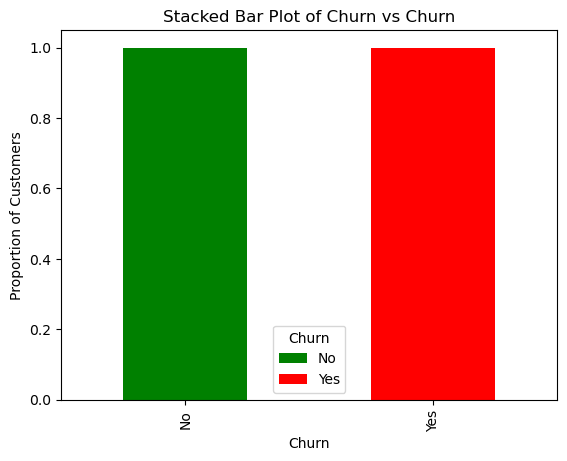

In [5]:
# Bar plots for categorical features against Churn
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    churn_rate = telco_churn_df.groupby(col)['Churn'].value_counts(normalize=True).unstack()
    churn_rate.plot(kind='bar', stacked=True, color=['green', 'red'])
    plt.title(f'Stacked Bar Plot of {col} vs Churn')
    plt.ylabel('Proportion of Customers')
    plt.show()


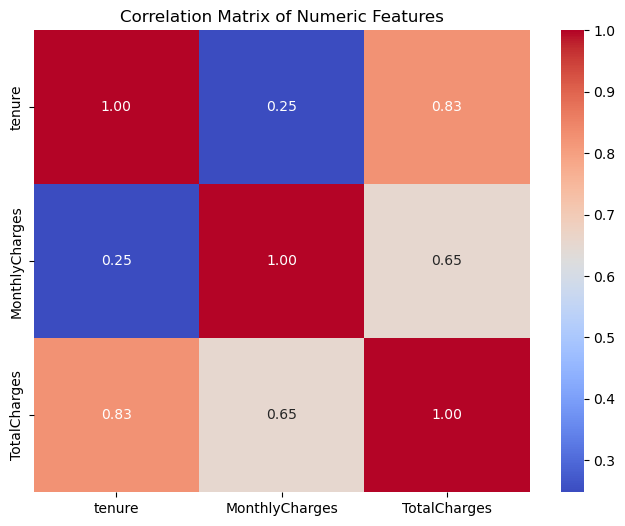

In [6]:
# Correlation matrix for numeric features
plt.figure(figsize=(8, 6))
sns.heatmap(telco_churn_df[numeric_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()





In [8]:
from scipy.stats import chi2_contingency

# List of categorical variables to test, excluding 'Churn' and 'customerID'
categorical_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

# Perform Chi-squared tests
for var in categorical_vars:
    contingency_table = pd.crosstab(telco_churn_df[var], telco_churn_df['Churn'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-squared Test for {var} vs Churn: Chi2 = {chi2}, p-value = {p_value}")


Chi-squared Test for gender vs Churn: Chi2 = 0.4840828822091383, p-value = 0.48657873605618596
Chi-squared Test for SeniorCitizen vs Churn: Chi2 = 159.42630036838742, p-value = 1.510066805092378e-36
Chi-squared Test for Partner vs Churn: Chi2 = 158.7333820309922, p-value = 2.1399113440759935e-36
Chi-squared Test for Dependents vs Churn: Chi2 = 189.12924940423474, p-value = 4.9249216612154196e-43
Chi-squared Test for PhoneService vs Churn: Chi2 = 0.9150329892546948, p-value = 0.3387825358066928
Chi-squared Test for MultipleLines vs Churn: Chi2 = 11.33044148319756, p-value = 0.0034643829548773
Chi-squared Test for InternetService vs Churn: Chi2 = 732.309589667794, p-value = 9.571788222840544e-160
Chi-squared Test for OnlineSecurity vs Churn: Chi2 = 849.9989679615965, p-value = 2.661149635176552e-185
Chi-squared Test for OnlineBackup vs Churn: Chi2 = 601.812790113409, p-value = 2.0797592160864276e-131
Chi-squared Test for DeviceProtection vs Churn: Chi2 = 558.419369407389, p-value = 5.505

## Significant Variables (p-value < 0.05):

SeniorCitizen: Very significant (p-value ~ 1.51e-36  
Partner: Very significant (p-value ~ 2.14e-36)  
Dependents: Very significant (p-value ~ 4.92e-43)  
MultipleLines: Significant (p-value ~ 0.0035)  
InternetService: Extremely significant (p-value ~ 9.57e-160)  
OnlineSecurity: Extremely significant (p-value ~ 2.66e-185)  
OnlineBackup: Extremely significant (p-value ~ 2.08e-131)  
DeviceProtection: Extremely significant (p-value ~ 5.51e-122)  
TechSupport: Extremely significant (p-value ~ 1.44e-180)  
StreamingTV: Extremely significant (p-value ~ 5.53e-82)  
StreamingMovies: Extremely significant (p-value ~ 2.67e-82)  
Contract: Extremely significant (p-value ~ 5.86e-258)  
PaperlessBilling: Extremely significant (p-value ~ 4.07e-58)  
PaymentMethod: Extremely significant (p-value ~ 3.68e-140)  

## Non-significant Variables (p-value >= 0.05):

gender: Not significant (p-value ~ 0.487)  
PhoneService: Not significant (p-value ~ 0.339)